<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

watermark 2.0.2
autopep8  1.5
numpy     1.18.1
json      2.0.9
Fri Mar 27 2020 2020-03-27T12:32:58-04:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : fa4b4ee7b722c78c9c584fcc1d13d9c821b8dff2


In [3]:
plt.style.use('./d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

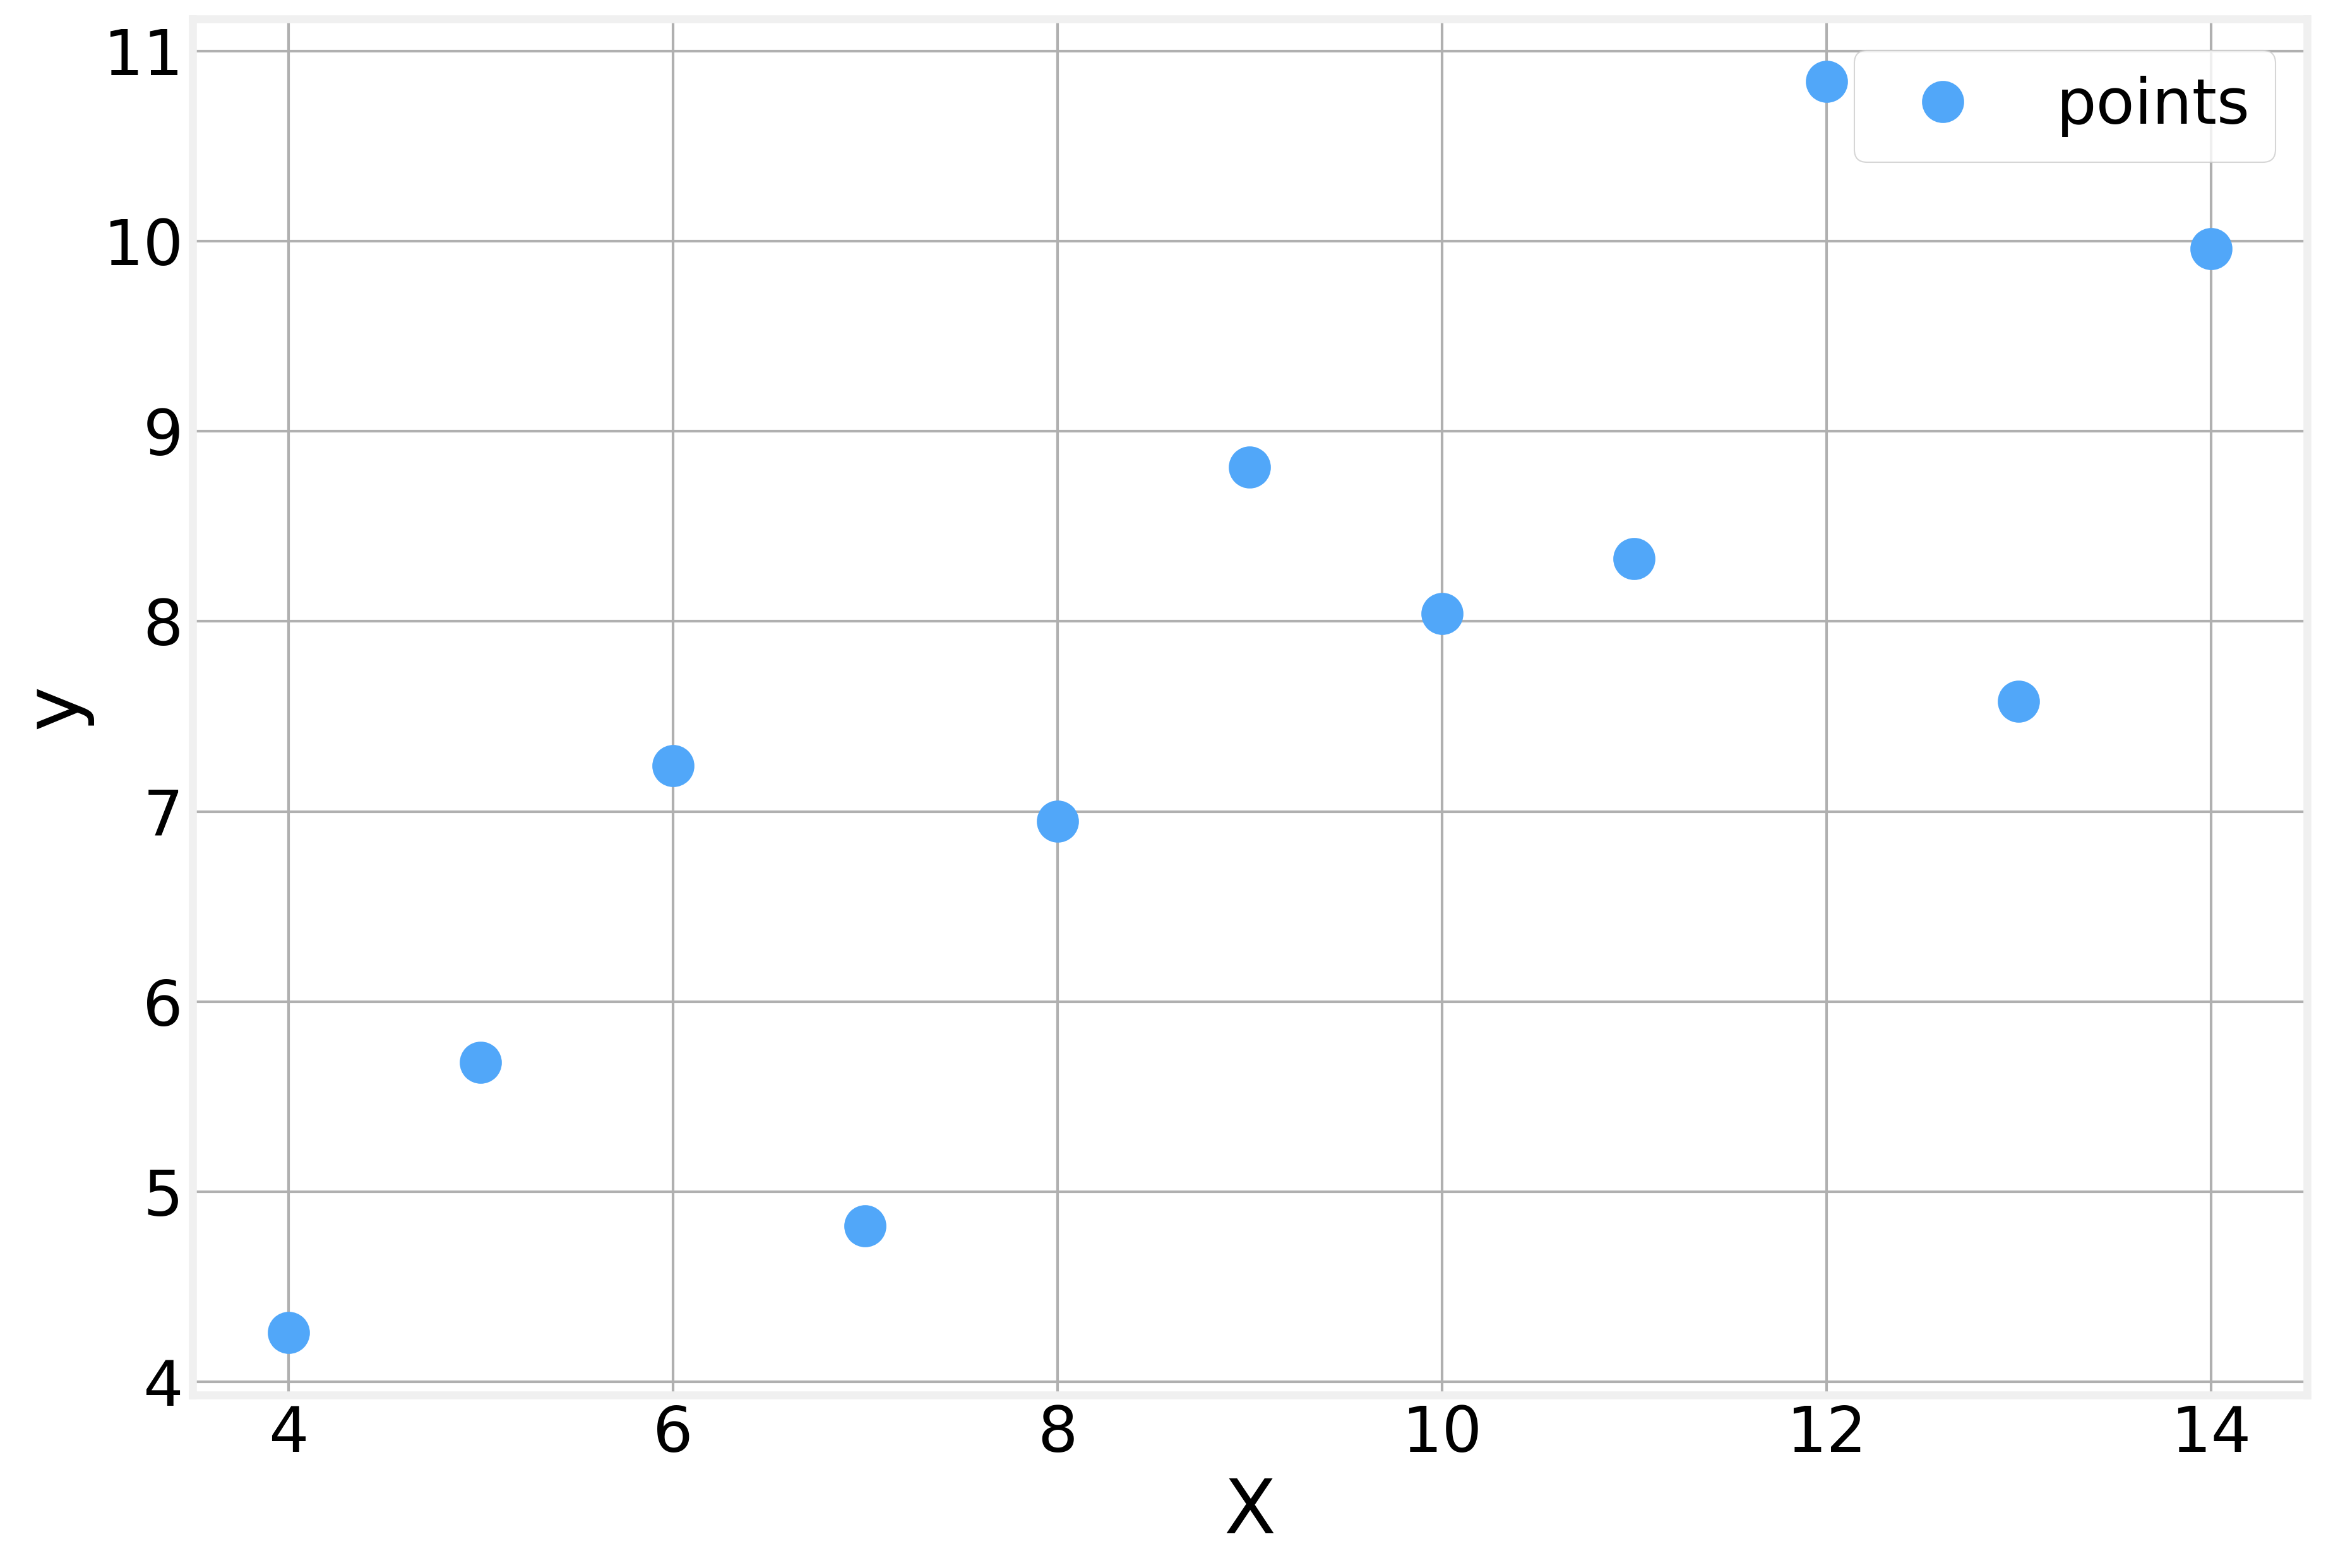

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 0.9990379675741784 0.0008141623127184694 [0.39583888 0.75796268]
200 0.9259563294410245 0.000654841013524643 [0.66450713 0.73135928]
300 0.867175846437166 0.0005266968837729369 [0.90545816 0.70750042]
400 0.8198979628206057 0.00042362894450109767 [1.12155143 0.68610297]
500 0.7818717649223277 0.0003407301014085595 [1.31535138 0.666913  ]
600 0.751286814497591 0.00027405351667475486 [1.48915792 0.64970276]
700 0.7266869532391518 0.00022042469887795235 [1.64503367 0.63426802]
800 0.7069009746604503 0.0001772903645435031 [1.78482845 0.62042561]
900 0.690986862617135 0.000142596875576384 [1.91020128 0.60801125]
1000 0.6781869416468463 0.00011469246496542684 [2.02263999 0.59687762]
1100 0.6678918038220217 9.224859567735777e-05 [2.12347894 0.5868926 ]
1200 0.6596112946627732 7.419670862407468e-05 [2.21391481 0.57793768]
1300 0.65295117674079 5.967734825951254e-05 [2.29502085 0.5699066 ]
1400 0.6475943599217207 4.7999243649843315e-05 [2.36775956 0.56270405]
1500 0.6432858046124599 3.86063

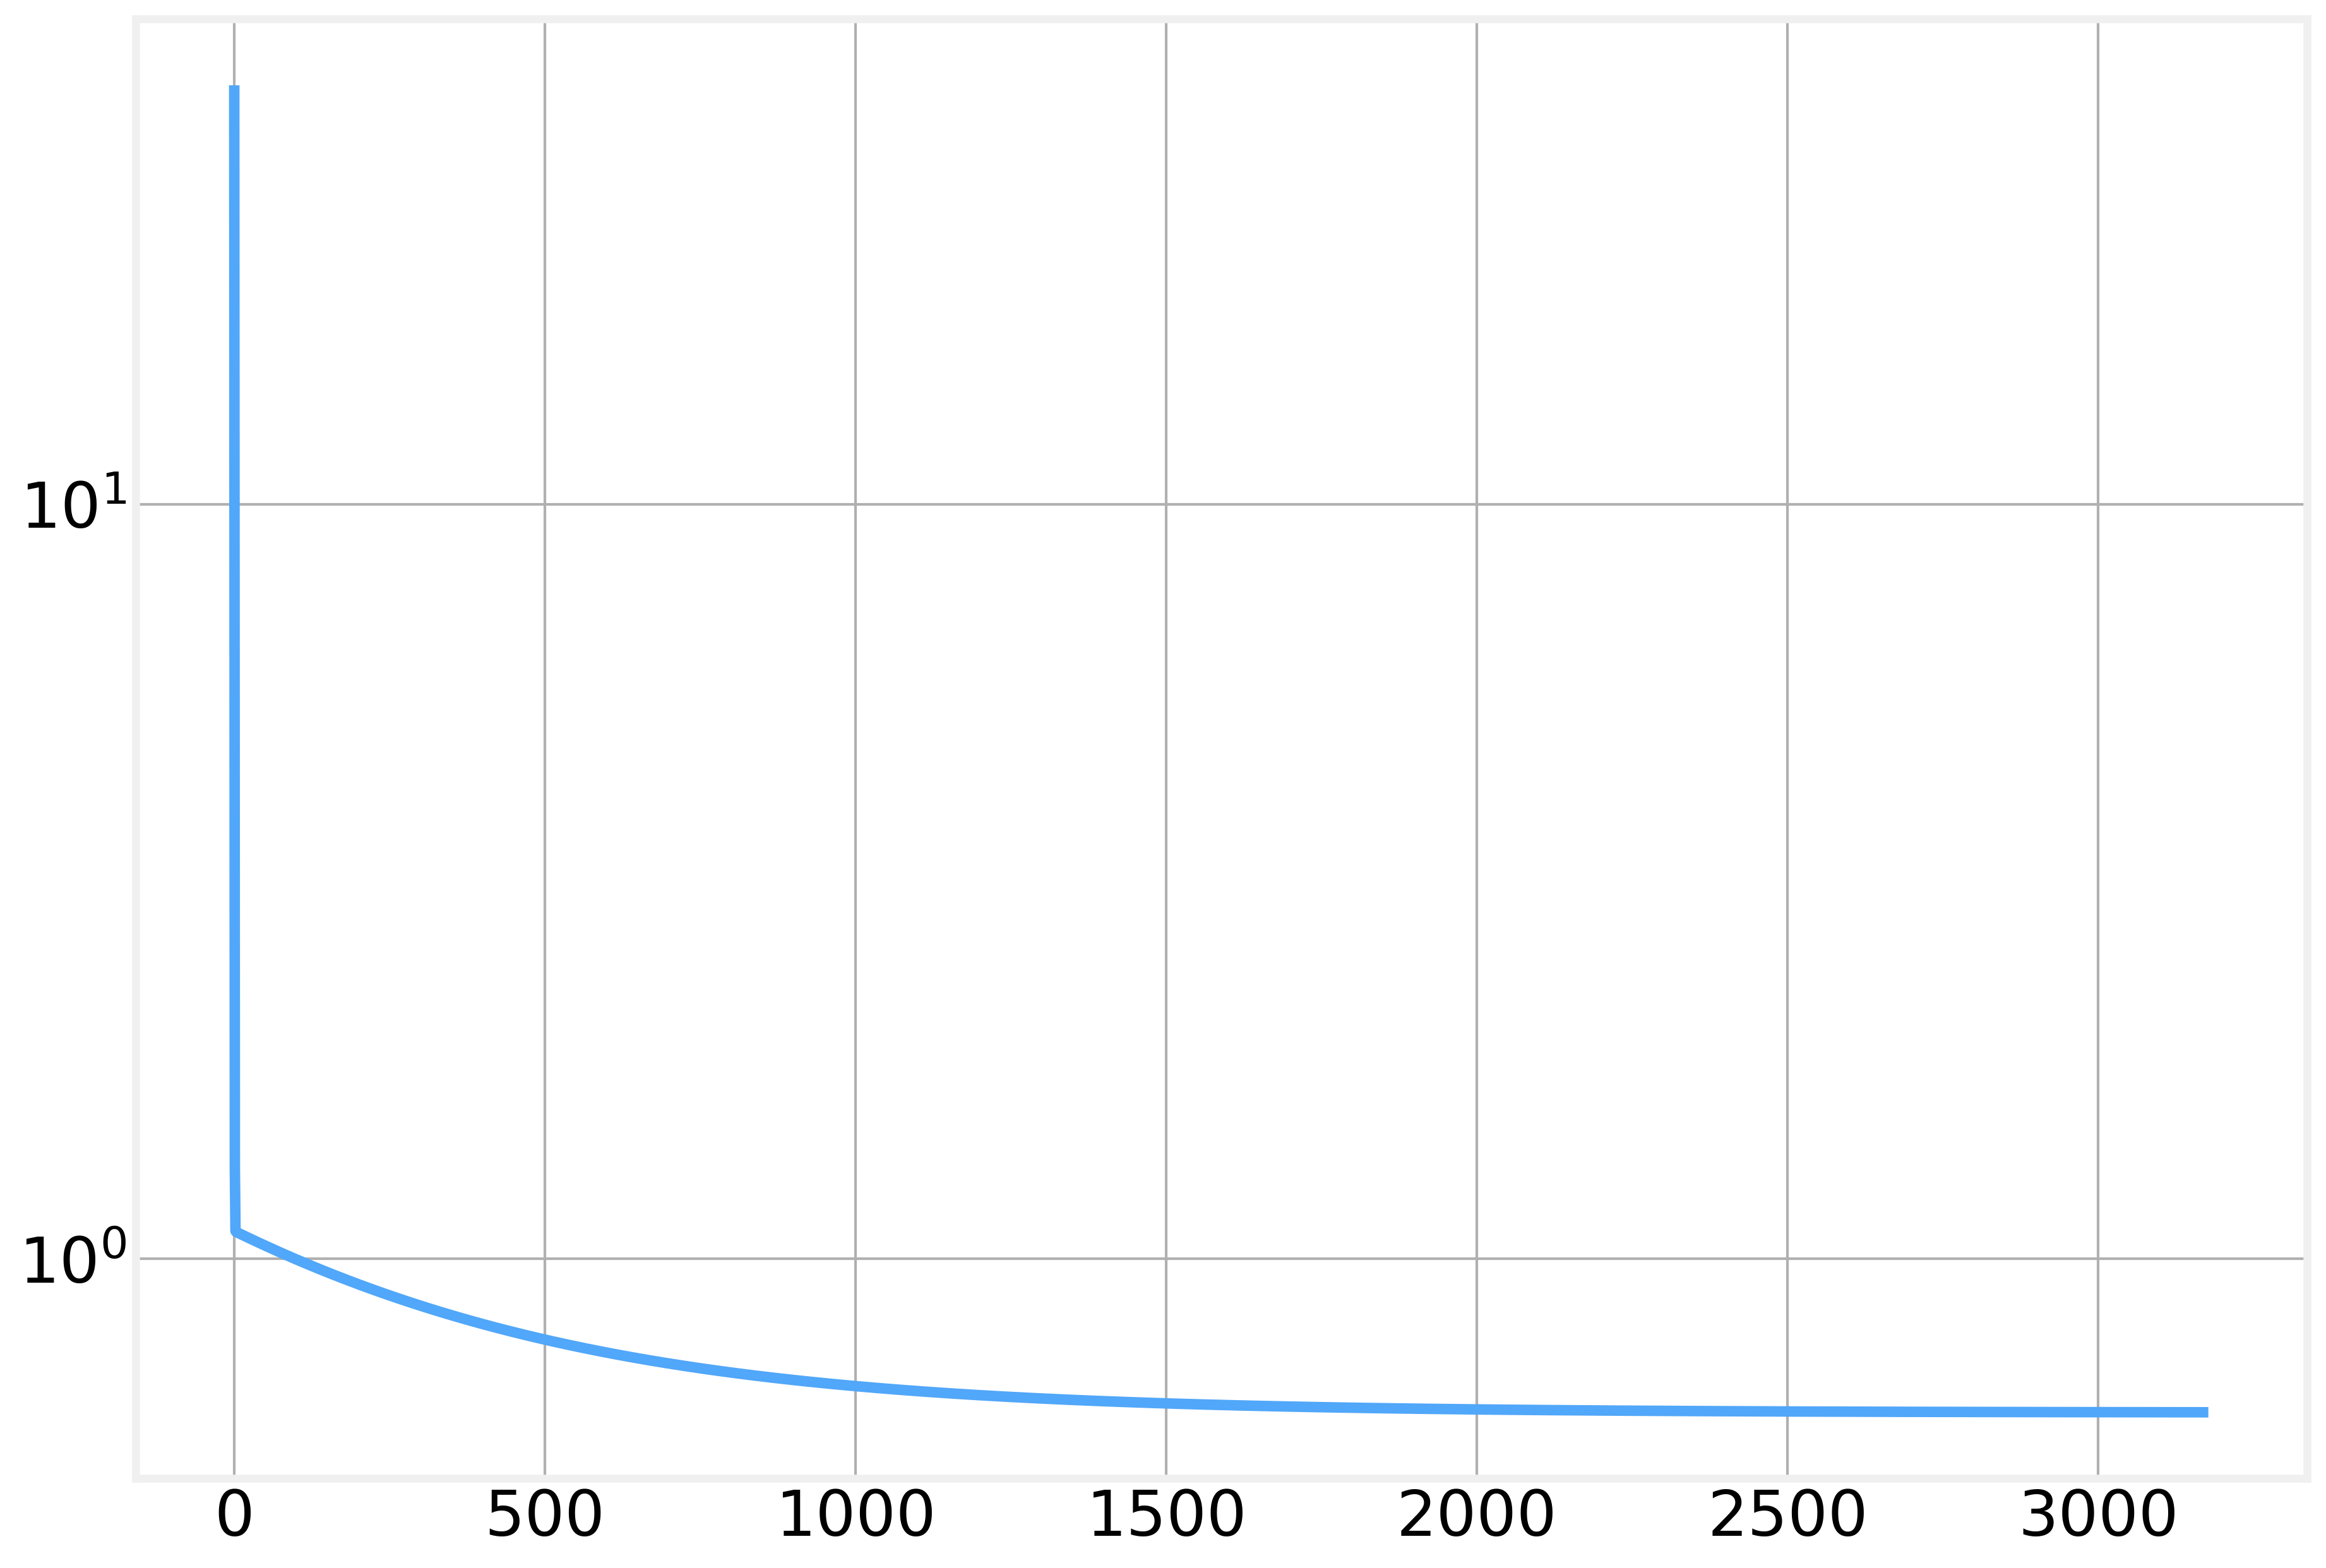

In [14]:
plt.semilogy(Js)

In [15]:
weights.flatten()

array([2.90885373, 0.50912517])

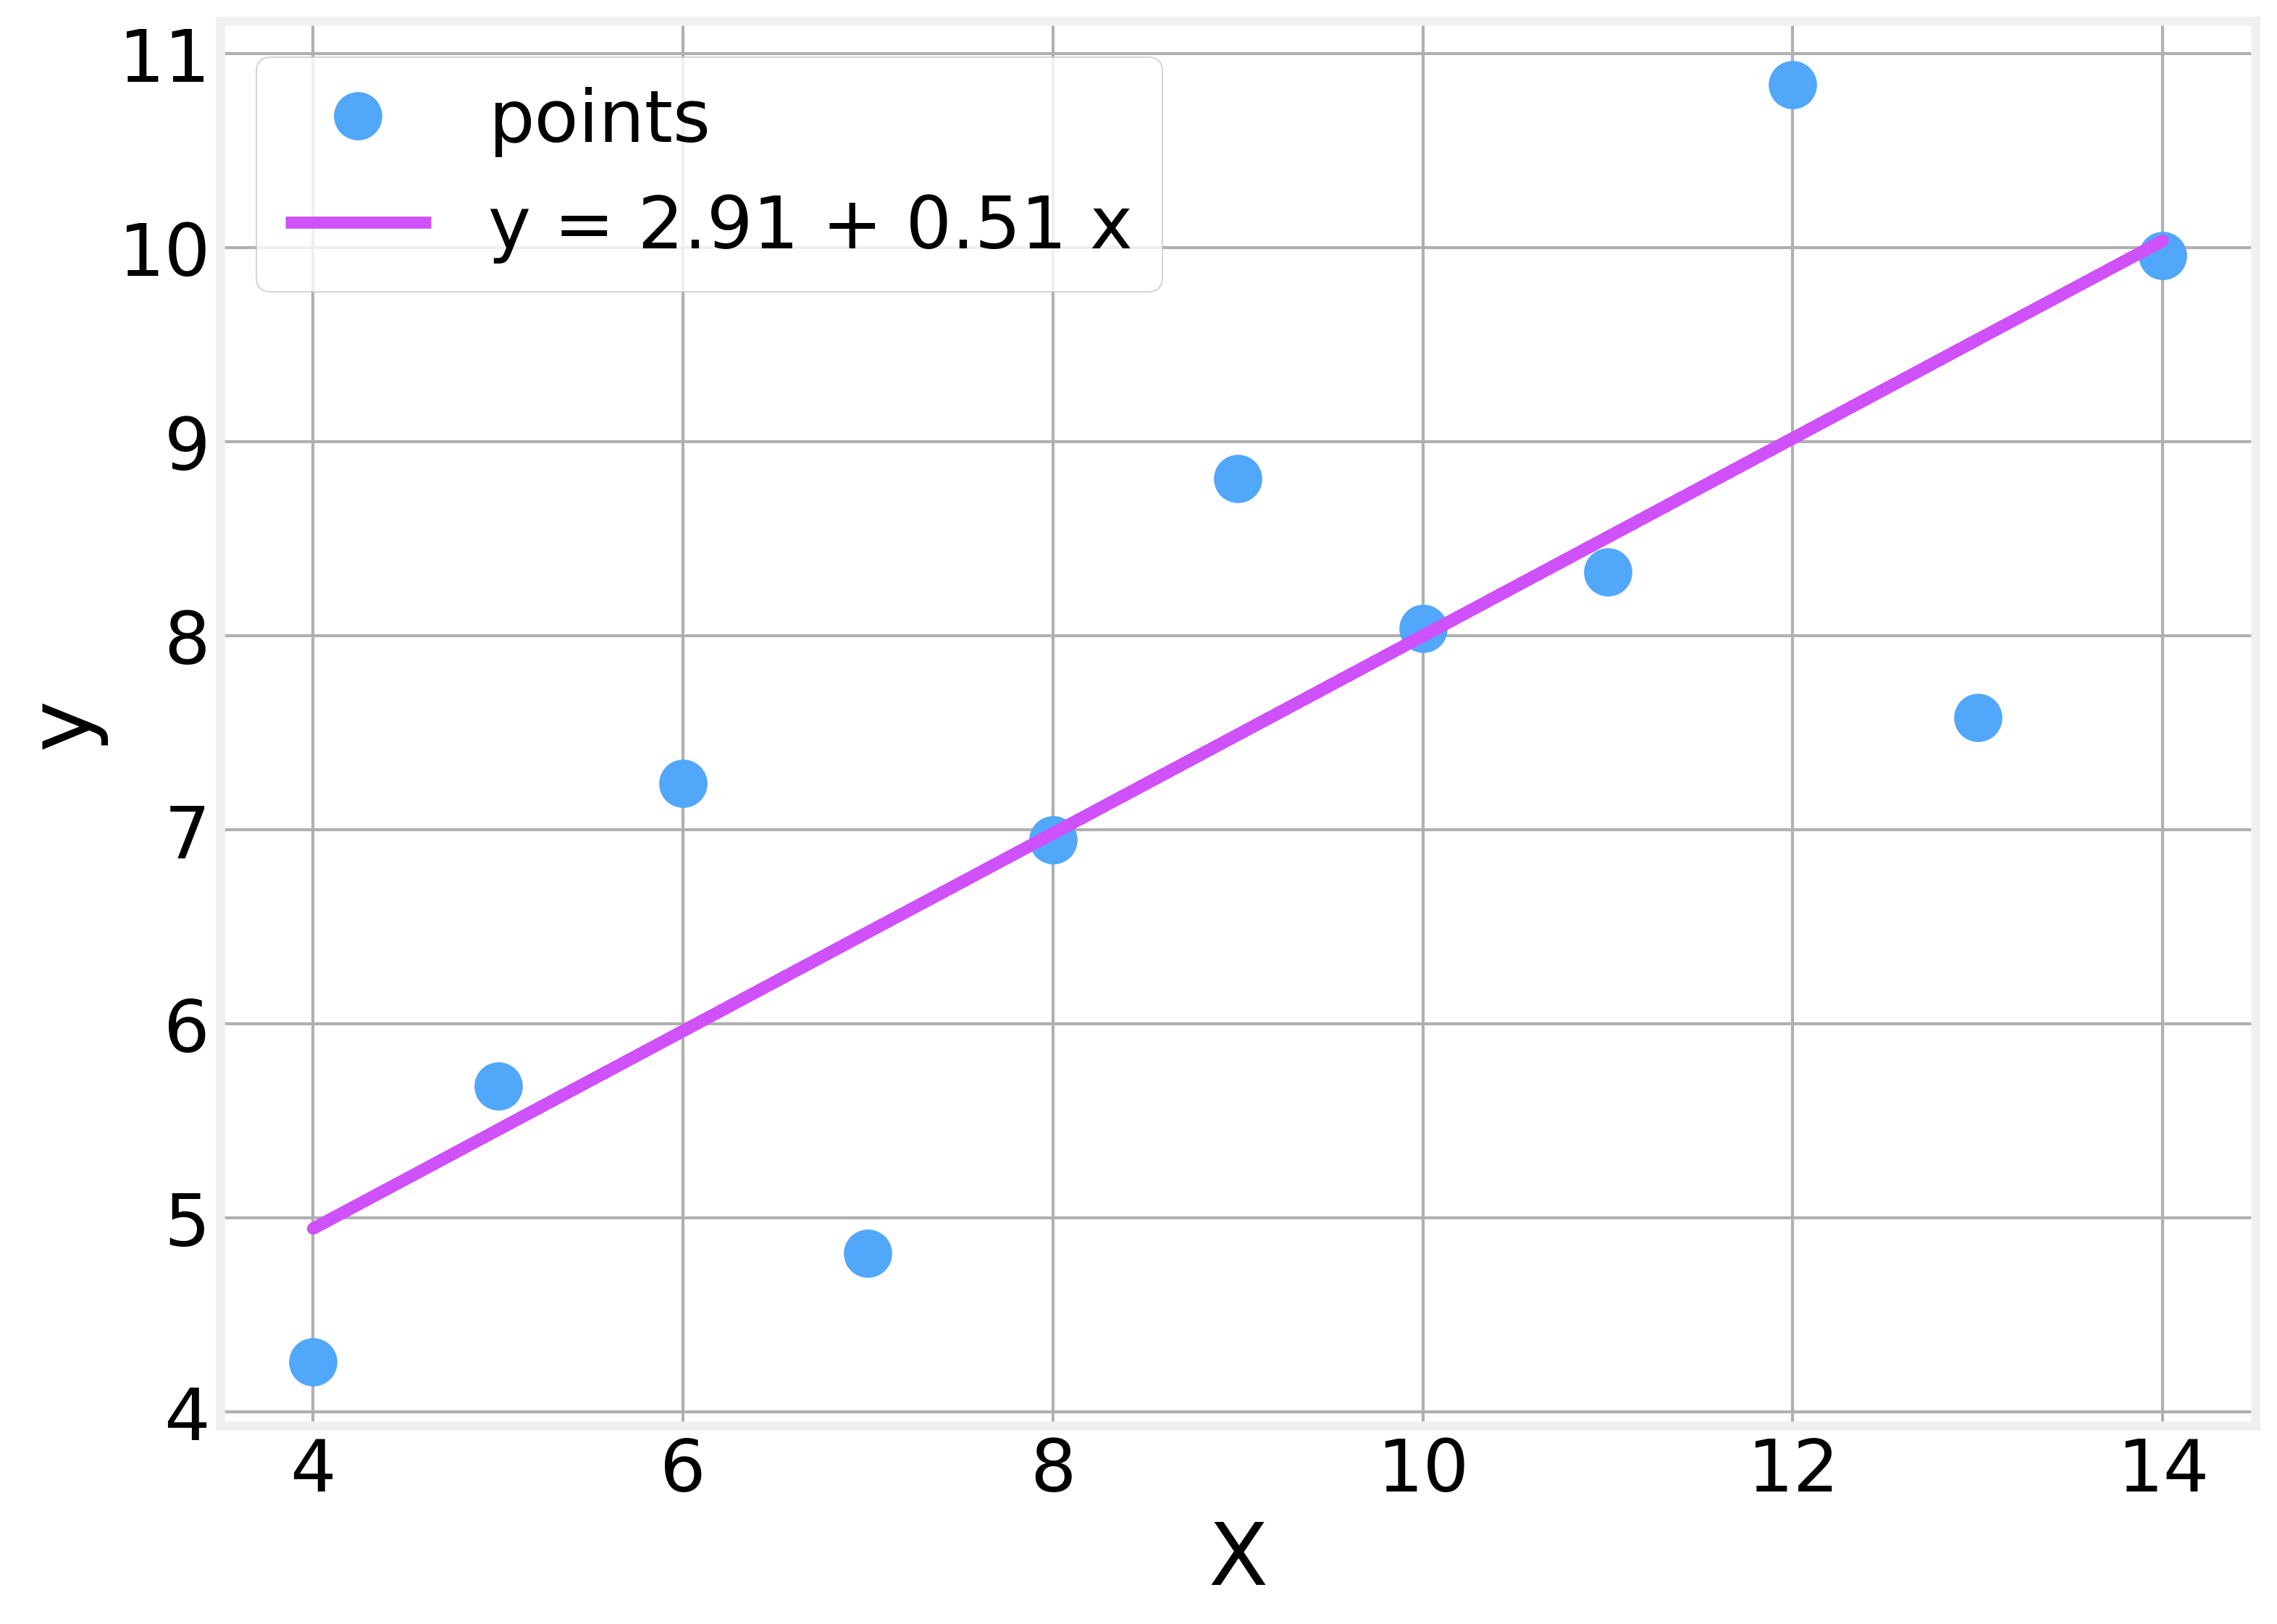

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>